In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)

# Project
## Author Identification Analysis 

In [10]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\labeled_sentence_corpus.csv")

# Data Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50952 entries, 0 to 50951
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50952 non-null  object
 1   author  50952 non-null  object
dtypes: object(2)
memory usage: 796.3+ KB


In [12]:
df.shape

(50952, 2)

In [13]:
df.head()

,text,author
0,"I am as positive that yesterday was Sunday as I am that I sit upon this chair.""",EAP
1,"""By the Waters of the Brook,"" by Rev.",HPL
2,Even for thy woes I love thee-even for thy woes- Thy beauty and thy woes.,EAP
3,Negotium perambulans in tenebris.,HPL
4,"Perdita tried to read his countenance, which he angrily averted.",MWS


# Data Handling & Cleaning

In [14]:
df.isna().sum()

text      0
author    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50952 entries, 0 to 50951
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50952 non-null  object
 1   author  50952 non-null  object
dtypes: object(2)
memory usage: 796.3+ KB


# Machine Learning & Visualization

<Axes: title={'center': 'Author Classification By Percentage'}, ylabel='count'>

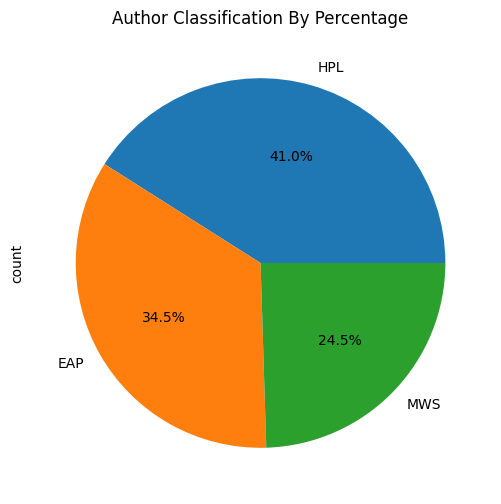

In [24]:
df["author"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(10,6),title="Author Classification By Percentage")

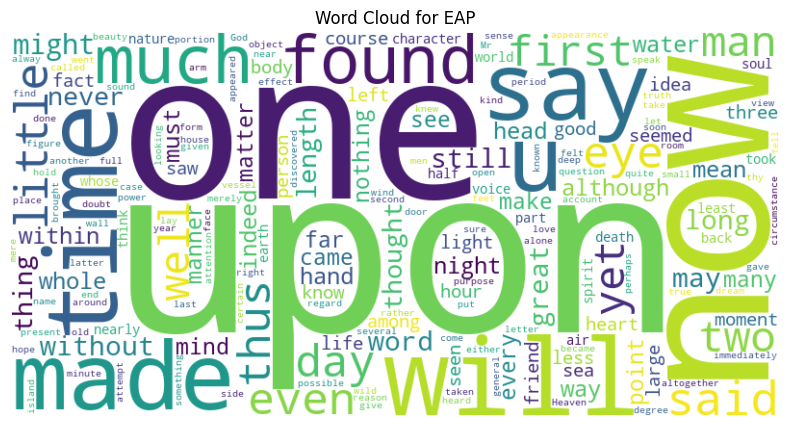

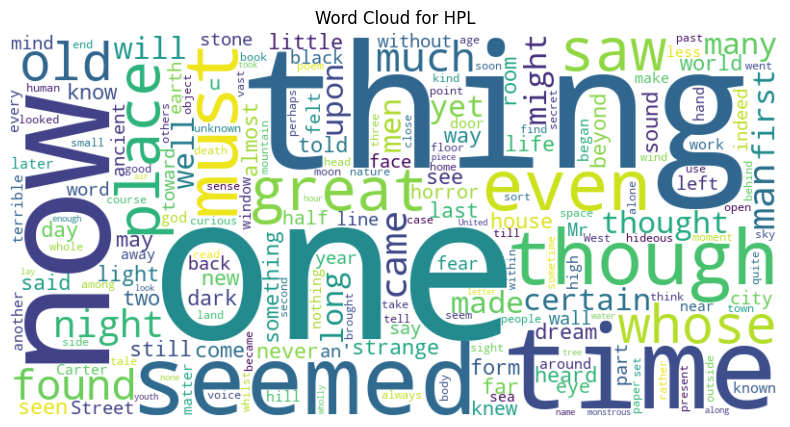

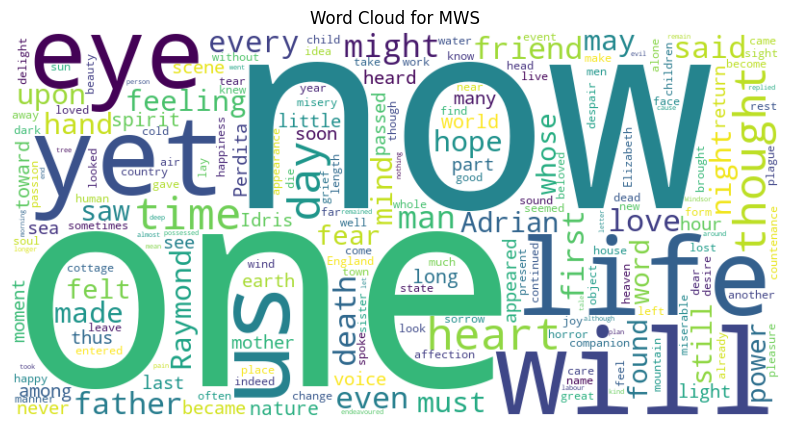

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for author in df['author'].unique():
    text = " ".join(df[df['author'] == author]['text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {author}")
    plt.show()


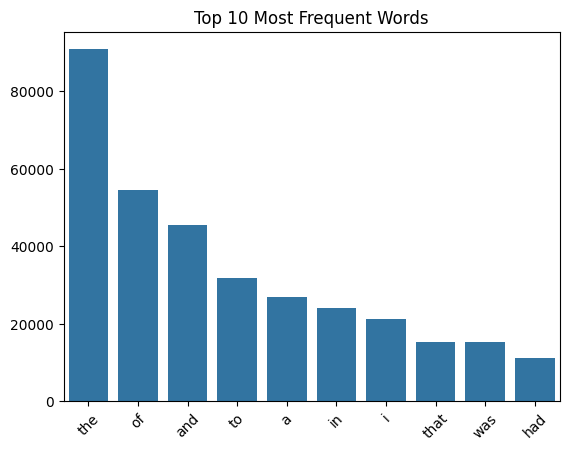

In [26]:
from collections import Counter
import seaborn as sns

all_words = " ".join(df['text']).lower().split()
common_words = Counter(all_words).most_common(10)
words, counts = zip(*common_words)

sns.barplot(x=list(words), y=list(counts))
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['author'])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔍 {name} Classification Report:")
    print(classification_report(y_test, preds, target_names=le.classes_))



🔍 Naive Bayes Classification Report:
              precision    recall  f1-score   support

         EAP       0.77      0.75      0.76      3515
         HPL       0.80      0.87      0.83      4179
         MWS       0.82      0.73      0.77      2497

    accuracy                           0.79     10191
   macro avg       0.80      0.78      0.79     10191
weighted avg       0.79      0.79      0.79     10191


🔍 Logistic Regression Classification Report:
              precision    recall  f1-score   support

         EAP       0.75      0.79      0.77      3515
         HPL       0.83      0.84      0.83      4179
         MWS       0.81      0.74      0.77      2497

    accuracy                           0.80     10191
   macro avg       0.80      0.79      0.79     10191
weighted avg       0.80      0.80      0.80     10191


🔍 Random Forest Classification Report:
              precision    recall  f1-score   support

         EAP       0.69      0.69      0.69      3515
     

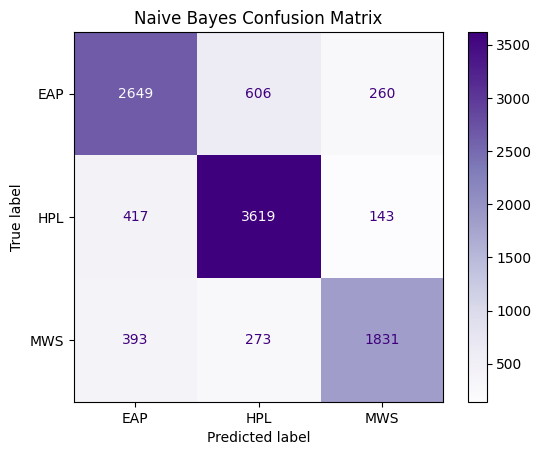

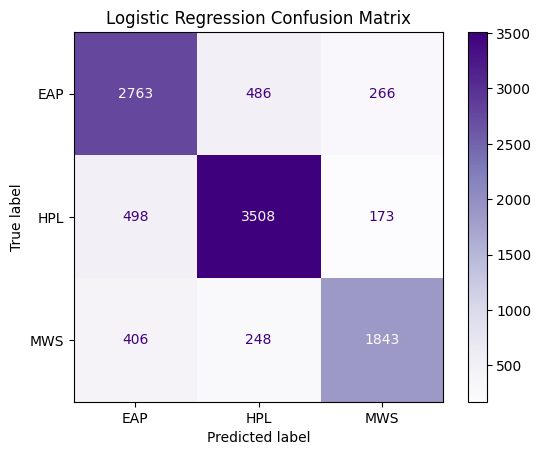

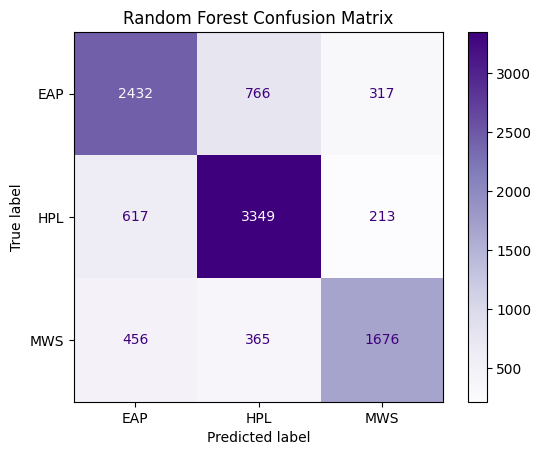

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Purples')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
